In [40]:
import numpy as np
import pyaudio
import time
from pyldpc import make_ldpc, encode, decode, get_message
import matplotlib.pyplot as plt 

# Ses kayıt parametreleri
FORMAT = pyaudio.paInt16
CHANNELS = 1
chunk = 512
CHUNK = chunk
rate = 44100
fc = 4000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk / rate, 1 / rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# LDPC kodlama parametreleri
n = 32
d_v = 5
d_c = 8
snr = 1000
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
print(k)

# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=rate,
    output=True,
    frames_per_buffer=CHUNK
)

def kodla(G, v, snr):
    """Verilen mesajı LDPC kodlamasıyla kodlar.

    Args:
        G: LDPC kodlama matrisi.
        v: Kodlanacak mesaj.
        snr: Sinyal-gürültü oranı.

    Returns:
        Kodlanmış mesaj.
    """
    y = encode(G, v, snr)
    return y

def ses_gonder(bits, fc, kf, t, A, G, snr=20):
    """Kodlanmış verileri FM modülasyonu kullanarak ses cihazına gönderir.

    Args:
        bits: Kodlanmış mesaj.
        fc: Taşıyıcı sinyal frekansı.
        kf: Frekans sapması.
        t: Zaman aralığı.
        A: Taşıyıcı sinyal genliği.
        G: LDPC kodlama matrisi.
        snr: Sinyal-gürültü oranı.
    """
    data = bits  # Kodlama işlemi
    m = np.repeat(data, CHUNK // len(data))  # Verileri ses sinyali uzunluğuna genişletme
    
    # FM modülasyonunu uygula
    s = A * np.cos(2 * np.pi * (fc + kf * m) * t) * 32767

    # Modüle edilmiş dalgayı ses cihazına gönderme
    stream.write(s.astype(np.int16).tobytes())

def onluk_binarye_cevir(onluk_sayi, G, snr=20):
    """Verilen onluk sayıyı 16 bitlik bir binary diziye çevirir ve kodlar.

    Args:
        onluk_sayi: Dönüştürülecek onluk sayı.
        G: LDPC kodlama matrisi.
        snr: Sinyal-gürültü oranı.

    Returns:
        16 bitlik binary dizi (liste).
    """
    binary_dizi = np.array([int(bit) for bit in bin(onluk_sayi)[2:].zfill(16)])
    binary_dizi = kodla(G, binary_dizi, snr)  # Kodlama işlemi
    return binary_dizi

# Kullanım örneği:
sayac = 0
for i in range(10000):
    v = onluk_binarye_cevir(i, G, snr)  # Onluk sayıyı binary'ye çevirip kodla
    ses_gonder(v, fc, kf, t, A, G, snr)  # Veriyi ses olarak gönder
      
# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [35]:
!pip install numpy==1.21.0 scipy==1.7.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Installing build dependencies .done
  Getting requirements to build wheel ... one
  Preparing metadata (pyproject.toml) ... one
ERROR: Could not find a version that satisfies the requirement scipy==1.7.0 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3, 1.8.0rc4, 1.8.0, 1.8.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0rc2, 1.10.0, 1.10.1, 1.11.0rc1, 1.11.0rc2, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.11.4, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.13.0rc1, 1.13.0, 1.

In [2]:
onluk_binarye_cevir(8)

NameError: name 'onluk_binarye_cevir' is not defined

print(len(sound_bits))


>>> import numpy as np
>>> from pyldpc import make_ldpc, encode, decode, get_message
>>> n = 32
>>> d_v = 4
>>> d_c = 8
>>> snr = 1000
>>> H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
>>> k = G.shape[1]
>>> v = np.random.randint(2, size=k)
>>> y = encode(G, v, snr)
>>> d = decode(H, y, snr)
>>> x = get_message(G, d)
>>> assert abs(x - v).sum() == 0

print(len(y))

print(len(v))

n = 32
d_v = 8
d_c = 16
snr = 20
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]

d = decode(H, y, 20)
x = get_message(G, d)
x


print(len(y))

y

In [ ]:
bitler#=[1,1, 1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]

In [ ]:
bitler=np.array(bitler)
bitler=np.where(bitler==0,-1,1)
d = decode(H, bitler, snr)
x= get_message(G, d)



In [ ]:
x

aci = np.arcsin(0.5)  

In [ ]:
modüle_edilmis_dalga

In [ ]:
m2=modüle_edilmis_dalga/32767

In [ ]:
snr=20
for n in range(100):
    for d_v in range(100):
        for d_c in range(100):
            try:
                H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
                k = G.shape[1]
                if k==16:
                    print(n,d_v,d_c)

            except:
                    continue
k

In [ ]:
t = np.arange(0, 2048) / RATE
tasiyici_dalga = np.sin(2 * np.pi * 5000 * t)
tasiyici_dalga=np.where(tasiyici_dalga==0,1e-10,tasiyici_dalga)




In [ ]:
genis_veri=(m2/tasiyici_dalga +1)/2
genis_veri=np.where(genis_veri <=0,-1,genis_veri)


In [ ]:
a=al(genis_veri)

a


In [ ]:
def al(data):
	n = 33
	d_v = 2
	d_c = 33
	snr = 20
	H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
	gruplar = [data[i:i+64] for i in range(0, len(data), 64)]
	ana_ort=np.abs(np.mean(data))
	ortalamalar =[]
	
	for grup in gruplar:
		ortalama=np.mean(grup)
		if ortalama <=0:
			ortalamalar.append(ortalama)
		else:
			ortalamalar.append(ortalama)
	ortalamalar=np.array(ortalamalar)	
	#print(ortalamalar[0])	
	d = decode(H, ortalamalar, snr)
	x=get_message(G, d)
			
	return x

In [ ]:
def kodla(data, n=33, d_v=2, d_c=33):
  """Verilen verileri LDPC kodu ile kodlar.

  Args:
      data: Kodlanacak veri dizisi.
      n: Toplam bit sayısı.
      d_v: Doğrultulu düğüm derecesi.
      d_c: Kontrol düğüm derecesi.

  Returns:
      Kodlanmış veri dizisi.
  """
  H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)  # LDPC matrislerini oluştur
  codeword = encode(G, data,snr=20)  # Veriyi kodla
  return codeword

In [ ]:

bits =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,0]
kod=kodla(bits)

tasiyici_frekans = 2000

In [ ]:

# Veriyi genişlet (CHUNK uzunluğunda)
genisletilmis_veri = np.repeat(bits, 512 // len(bits))

t = np.arange(0, len(genisletilmis_veri)) / RATE
sinyal = np.sin(2 * np.pi * tasiyici_frekans * t)

m = np.cos(tasiyici_dalga * (genisletilmis_veri *2*t))


In [ ]:
# Parametreleri tanımla
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 1  # Modüle edici sinyal frekansı (Hz)
fs = 44100 # Örnekleme frekansı (Hz)
t = np.arange(0, 512)/fs  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 10  # Frekans sapması (Hz)

# Modüle edici sinyali oluştur
m = genisletilmis_veri = np.repeat(bits, 512 // len(bits))#A * np.sin(2 * np.pi * fm * t)

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m))

In [ ]:
plt.plot(t,m)

In [ ]:
plt.plot(t,genisletilmis_veri)

In [ ]:
genisletilmis_veri

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# Modüle edici sinyali oluştur
m = A * np.sin(2 * np.pi * fm * t)

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m) / rate)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(2, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

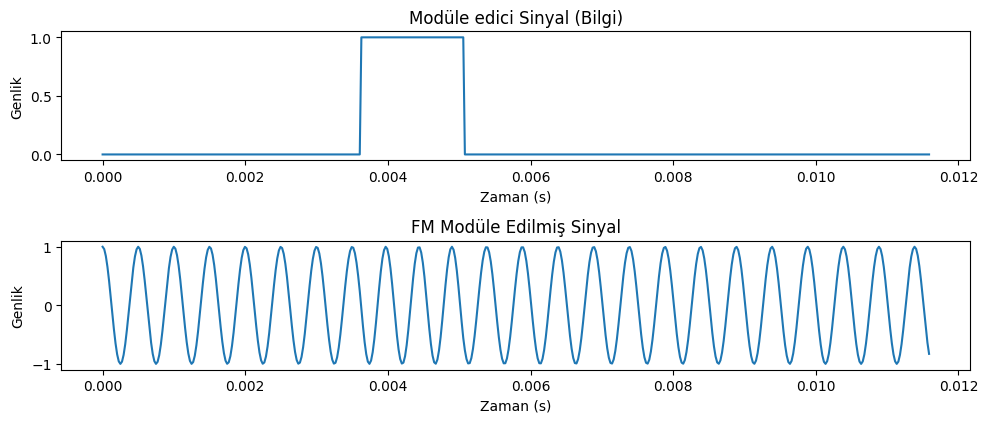

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)



# Modüle edilecek bilgiyi tanımla
data = [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    # Değişiklik burada:
    m[start_idx:end_idx] = data[i] * A

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kf * np.cumsum(m) / rate)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')



plt.tight_layout()
plt.show()

In [ ]:
m

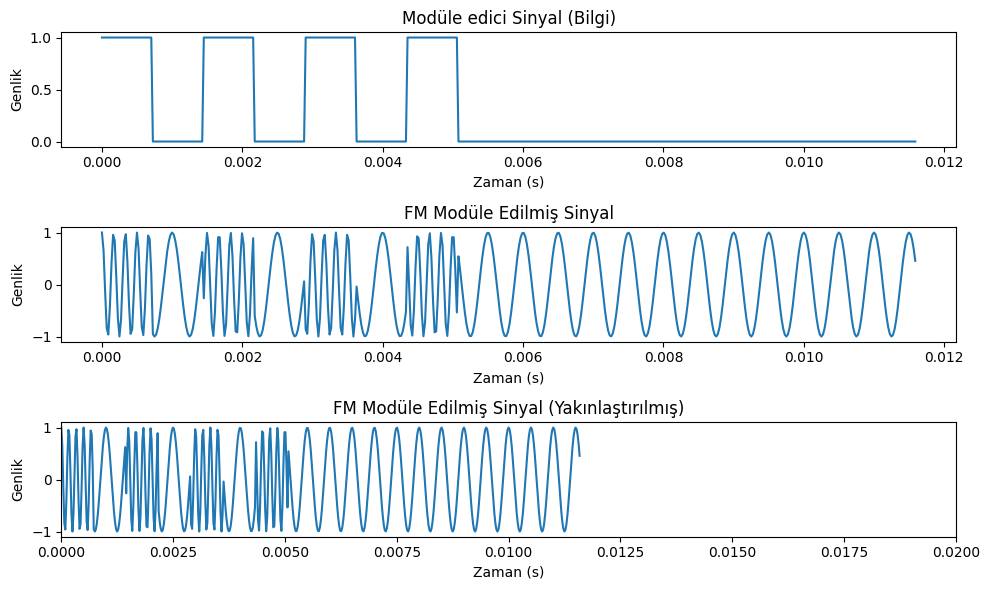

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 4000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    # Değişiklik burada:
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s= A * np.cos(2 * np.pi * (fc + kf * m) * t)  # Değişiklik burada

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 3)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal (Yakınlaştırılmış)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')
plt.xlim(0, 0.02)  # İlk 20 ms'i yakınlaştır

plt.tight_layout()
plt.show()

In [ ]:
bitler

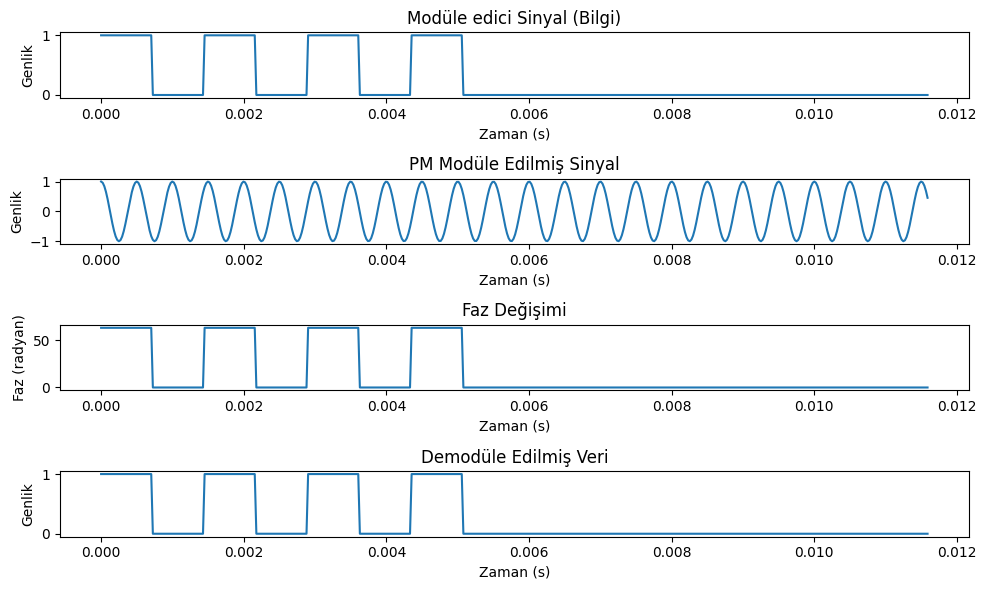

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kp = 2 * np.pi * 10  # Faz sapması (radyan)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i]

# PM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kp * m) 

# Faz Değişimini Hesaplama (PM için)
phase_change = kp * m 

# PM Demodülasyonu (Değişiklik burada!)
demodulated_data = phase_change / kp  # kp ile bölün

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 2)
plt.plot(t, s)
plt.title('PM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 3)
plt.plot(t, phase_change)
plt.title('Faz Değişimi')
plt.xlabel('Zaman (s)')
plt.ylabel('Faz (radyan)')

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_data)
plt.title('Demodüle Edilmiş Veri')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

In [ ]:
m

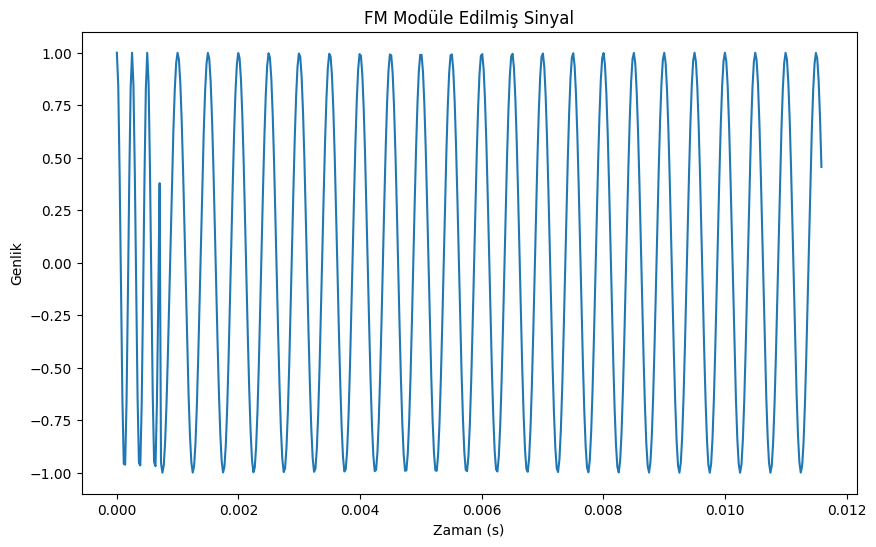

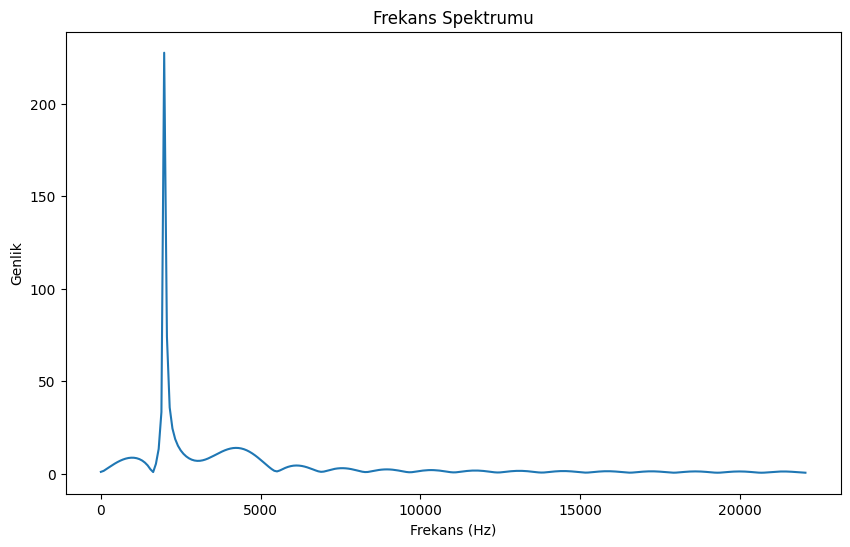

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# Demodülasyon:
# 1. FFT hesapla:
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)

# 2. Taşıyıcı sinyalin frekansı etrafındaki bölgeyi bul:
# (Bu örnekte, taşıyıcı frekans etrafında 100 Hz'lik bir bölge seçiliyor)
frekans_aralık = (frekans > fc - 100) & (frekans < fc + 100) 
spektrum_aralik = spektrum[frekans_aralık]
frekans_aralik = frekans[frekans_aralık]

# 3. Maksimum genlikli frekansı bul:
en_yüksek_genlik_indeksi = np.argmax(np.abs(spektrum_aralik))
en_yüksek_frekans = frekans_aralik[en_yüksek_genlik_indeksi]

# 4. Frekans kaymasının yönünü belirle:
# (Eğer en yüksek genlikli frekans taşıyıcı frekansından büyükse, 1 bit, 
#  küçükse 0 bit olarak kabul edilebilir)
bit = 1 if en_yüksek_frekans > fc else 0

# ... (Bu işlemi her bit için tekrarla) ...

# Demodüle edilmiş veriyi çiz:
plt.figure(figsize=(10, 6))
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.figure(figsize=(10, 6))
plt.plot(frekans, np.abs(spektrum))
plt.title('Frekans Spektrumu')
plt.xlabel('Frekans (Hz)')
plt.ylabel('Genlik')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 1024
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i] 

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# Demodülasyon:
demodulated_data = []
for i in range(len(data)):
    # Her bit için sinyal kesiti al:
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    s_kesit = s[start_idx:end_idx]

    # FFT hesapla:
    frekans = np.fft.rfftfreq(len(s_kesit), 1/rate)
    spektrum = np.fft.rfft(s_kesit)

    # Taşıyıcı frekans etrafındaki bölgeyi bul:
    frekans_aralık = (frekans > fc - 100) & (frekans < fc + 100) 
    spektrum_aralik = spektrum[frekans_aralık]
    frekans_aralik = frekans[frekans_aralık]

    # Maksimum genlikli frekansı bul:
    en_yüksek_genlik_indeksi = np.argmax(np.abs(spektrum_aralik))
    en_yüksek_frekans = frekans_aralik[en_yüksek_genlik_indeksi]

    # Frekans kaymasının yönünü belirle:
    bit = 1 if en_yüksek_frekans > fc else 0

    demodulated_data.append(bit)

# Sonuçları yazdır:
print("Orijinal Veri:", data)
print("Demodüle Edilmiş Veri:", demodulated_data)

1981.0546875
Frekans Daralmaları:
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]

Veri Sayıları:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


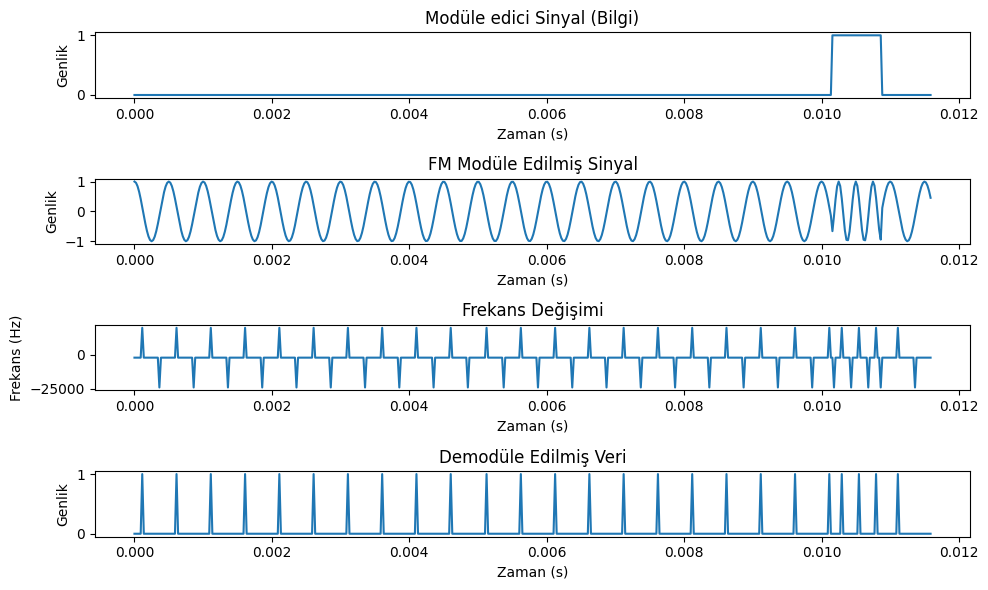

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 
bits=data
m = np.repeat(data, chunk // len(bits))

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# FM demodülasyonunu uygula
# 1. Frekansı tahmin etme:
estimated_fc = np.diff(np.unwrap(np.angle(s))) * rate / (2 * np.pi)
# 2. Frekans değişimini hesaplama:
frequency_change = estimated_fc - fc
# **Boyut eşleştirme:**
frequency_change = np.append(frequency_change, frequency_change[-1])

# 3. Veriyi geri kazanma:
# Eşik değeri kullanarak veriyi geri kazan:
threshold = np.mean(frequency_change)  # Frekans değişiminin ortalamasını eşik değeri olarak kullan
demodulated_data = (frequency_change > threshold).astype(int)
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)
frekans_peak = frekans[np.argmax(np.abs(spektrum))]
#print(np.argmax(np.abs(spektrum)))
print(frekans_peak)
# Daralan frekansları ve sayılarını belirleme
frekans_daralmaları = []
sayilar = []

daralma_baslangici = False
daralma_sayisi = 0
for i in range(len(frequency_change) - 1):
  if frequency_change[i] > threshold and not daralma_baslangici:  # Daralma başlangıcı
    daralma_baslangici = True
    daralma_sayisi = 1
  elif frequency_change[i] > threshold and daralma_baslangici:  # Daralma devam ediyor
    daralma_sayisi += 1
  elif frequency_change[i] <= threshold and daralma_baslangici:  # Daralma sonu
    frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i])
    sayilar.append(daralma_sayisi)
    daralma_baslangici = False

# Son bir daralma varsa, onu ekle
if daralma_baslangici:
  frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i+1])
  sayilar.append(daralma_sayisi)

# Çıktıları yazdır
print("Frekans Daralmaları:")
for daralma in frekans_daralmaları:
  print(daralma)

print("\nVeri Sayıları:")
print(sayilar)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 3)
plt.plot(t, frequency_change)
plt.title('Frekans Değişimi')
plt.xlabel('Zaman (s)')
plt.ylabel('Frekans (Hz)')

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_data)
plt.title('Demodüle Edilmiş Veri')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.tight_layout()
plt.show()

In [ ]:
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)
frekans_peak = frekans[np.argmax(np.abs(spektrum))]
print(np.argmax(np.abs(spektrum)))

In [ ]:
frekans_peak

In [ ]:
periyot=1/1981
periyot

In [ ]:
512/44100

In [ ]:

ilk=s[0]
degisim=1
sayi=1
tepe=0
cukur=0
inc=False
dec=False
sayac=0
for i in range(len(s)-1):
    fark=s[i+1]-s[i]

    if fark <0:
        dec=True
        inc=False
        sayi=1

    elif fark==0:
        print("sabit")

    else:
        dec=False
        inc=True
        sayi=-1


    if degisim*sayi<0:
        degisim=sayi
        
        if inc:
            cukur+=1

        else:
            tepe+=1

    if cukur+tepe>=3:
        cukur=0
        tepe=0
        sayac+=1
print(sayac)


    
    

In [ ]:
print(len(s))

1981.0546875
Frekans Daralmaları:
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]
[20050.]

Veri Sayıları:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


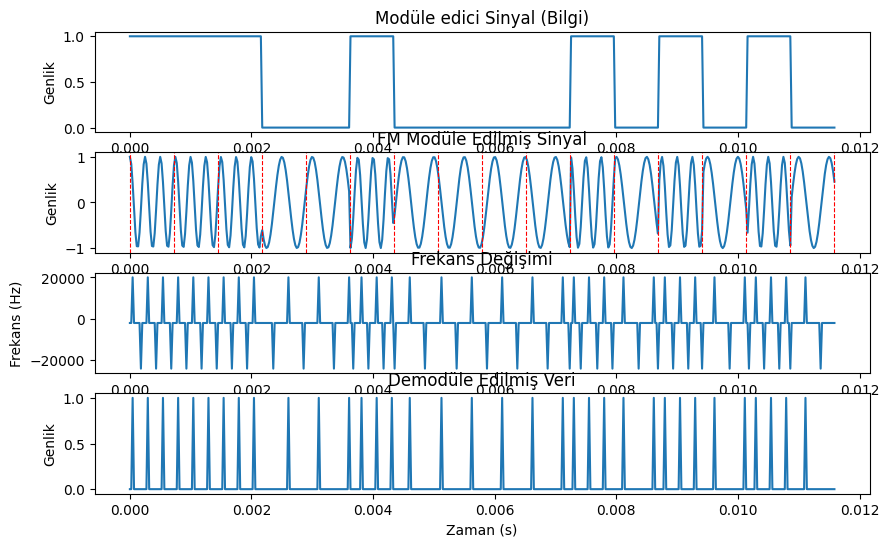

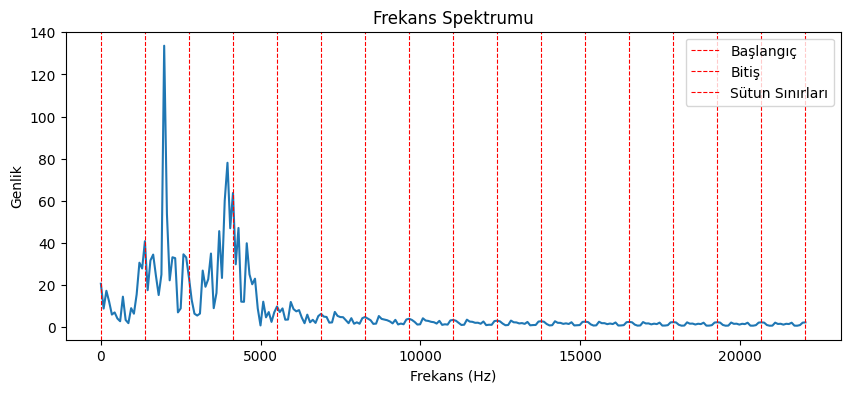

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kf = 2000  # Frekans sapması (Hz)

# Modüle edilecek bilgiyi tanımla
data = [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0] 
bits=data
m = np.repeat(data, chunk // len(bits))

# FM modülasyonunu uygula
s = A * np.cos(2 * np.pi * (fc + kf * m) * t)

# FM demodülasyonunu uygula
# 1. Frekansı tahmin etme:
estimated_fc = np.diff(np.unwrap(np.angle(s))) * rate / (2 * np.pi)
# 2. Frekans değişimini hesaplama:
frequency_change = estimated_fc - fc
# **Boyut eşleştirme:**
frequency_change = np.append(frequency_change, frequency_change[-1])

# 3. Veriyi geri kazanma:
# Eşik değeri kullanarak veriyi geri kazan:
threshold = np.mean(frequency_change)  # Frekans değişiminin ortalamasını eşik değeri olarak kullan
demodulated_data = (frequency_change > threshold).astype(int)
frekans = np.fft.rfftfreq(len(s), 1/rate)
spektrum = np.fft.rfft(s)
frekans_peak = frekans[np.argmax(np.abs(spektrum))]
#print(np.argmax(np.abs(spektrum)))
print(frekans_peak)
# Daralan frekansları ve sayılarını belirleme
frekans_daralmaları = []
sayilar = []

daralma_baslangici = False
daralma_sayisi = 0
for i in range(len(frequency_change) - 1):
  if frequency_change[i] > threshold and not daralma_baslangici:  # Daralma başlangıcı
    daralma_baslangici = True
    daralma_sayisi = 1
  elif frequency_change[i] > threshold and daralma_baslangici:  # Daralma devam ediyor
    daralma_sayisi += 1
  elif frequency_change[i] <= threshold and daralma_baslangici:  # Daralma sonu
    frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i])
    sayilar.append(daralma_sayisi)
    daralma_baslangici = False

# Son bir daralma varsa, onu ekle
if daralma_baslangici:
  frekans_daralmaları.append(frequency_change[i - daralma_sayisi:i+1])
  sayilar.append(daralma_sayisi)

# Çıktıları yazdır
print("Frekans Daralmaları:")
for daralma in frekans_daralmaları:
  print(daralma)

print("\nVeri Sayıları:")
print(sayilar)

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(4, 1, 2)
plt.plot(t, s)
plt.title('FM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

# Başlangıç ve bitiş çizgilerini çiz
plt.axvline(x=t[0], color='red', linestyle='--', linewidth=0.8, label='Başlangıç')
plt.axvline(x=t[-1], color='red', linestyle='--', linewidth=0.8, label='Bitiş')

# Ortasını 16 parçaya bölme
sutun_sayisi = 16
sutun_genisligi = (t[-1] - t[0]) / sutun_sayisi  # Zaman eksenindeki toplam aralığı kullan
sutun_sinirlar = np.arange(t[0] + sutun_genisligi, t[-1], sutun_genisligi)

# Sütun sınırlarını çizgi olarak gösterme
for i in range(sutun_sayisi - 1):
  plt.axvline(x=sutun_sinirlar[i], color='red', linestyle='--', linewidth=0.8, label='Sütun Sınırları' if i == 0 else '')

plt.subplot(4, 1, 3)
plt.plot(t, frequency_change)
plt.title('Frekans Değişimi')
plt.xlabel('Zaman (s)')
plt.ylabel('Frekans (Hz)')

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_data)
plt.title('Demodüle Edilmiş Veri')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

# Frekans spektrumunu çiz
plt.figure(figsize=(10, 4))
plt.plot(frekans, np.abs(spektrum))
plt.title('Frekans Spektrumu')
plt.xlabel('Frekans (Hz)')
plt.ylabel('Genlik')

# Başlangıç ve bitiş çizgilerini çiz
plt.axvline(x=frekans[0], color='red', linestyle='--', linewidth=0.8, label='Başlangıç')
plt.axvline(x=frekans[-1], color='red', linestyle='--', linewidth=0.8, label='Bitiş')

# Ortasını 16 parçaya bölme
sutun_sayisi = 16
sutun_genisligi = (frekans[-1] - frekans[0]) / sutun_sayisi  # Frekans eksenindeki toplam aralığı kullan
sutun_sinirlar = np.arange(frekans[0] + sutun_genisligi, frekans[-1], sutun_genisligi)

# Sütun sınırlarını çizgi olarak gösterme
for i in range(sutun_sayisi - 1):
  plt.axvline(x=sutun_sinirlar[i], color='red', linestyle='--', linewidth=0.8, label='Sütun Sınırları' if i == 0 else '')

plt.legend()
plt.show()

In [22]:
import numpy as np

def parca_kontrol(s, sutun_sayisi):
  """
  Verilen 's' verisini 'sutun_sayisi' kadar parçaya bölerek, her bir parçanın içinde kalan dalga sayısını kontrol eder.
  Dalga sayısı 1'den büyük olan parçalar için 1, aksi takdirde 0 değerini döndüren bir dizi oluşturur.

  Args:
    s: Kontrol edilecek verilerin numpy dizisi.
    sutun_sayisi: Verinin bölüneceği parça sayısı.

  Returns:
    Her bir parçanın kontrol sonucunu (1: anormal, 0: normal) gösteren bir numpy dizisi.
  """

  parca_kontrol_dizisi = []
  sutun_genisligi = len(s) / sutun_sayisi

  for i in range(sutun_sayisi):
    baslangic_indeksi = int(i * sutun_genisligi)
    bitis_indeksi = int((i + 1) * sutun_genisligi)

    parca = s[baslangic_indeksi:bitis_indeksi]

    # Parçanın frekans spektrumunu hesaplama
    frekans = np.fft.rfftfreq(len(parca), 1/rate)
    spektrum = np.fft.rfft(parca)
    frekans_peak = frekans[np.argmax(np.abs(spektrum))]

    # Dalga boyu kontrolü
    dalga_sayisi = int(frekans_peak * len(parca) / rate)
    print(dalga_sayisi)
    if dalga_sayisi > 2:
      parca_kontrol_dizisi.append(1)
    else:
      parca_kontrol_dizisi.append(0)

  return np.array(parca_kontrol_dizisi)

# Örnek kullanım:
#s = # ... (s verisi)
sutun_sayisi = 16
kontrol_dizisi = parca_kontrol(s, sutun_sayisi)

print("Parça Kontrol Dizisi:", kontrol_dizisi)

3
3
3
1
1
3
1
1
2
2
3
1
3
1
3
1
Parça Kontrol Dizisi: [1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0]


In [18]:
import numpy as np

def parca_kontrol(s, sutun_sayisi, rate):
  """
  Verilen 's' verisini 'sutun_sayisi' kadar parçaya bölerek, her bir parçanın içindeki frekansı hesaplar.
  Eğer parçanın frekansı ortalama frekanstan büyükse 1, değilse 0 değerini döndüren bir dizi oluşturur.

  Args:
    s: Kontrol edilecek verilerin numpy dizisi.
    sutun_sayisi: Verinin bölüneceği parça sayısı.
    rate: Örnekleme oranı (Hz).

  Returns:
    Her bir parçanın frekans kontrol sonucunu (1: büyük, 0: küçük) gösteren bir numpy dizisi.
  """

  frekanslar=[]
  sutun_genisligi = len(s) / sutun_sayisi
  ortalama_frekans = 0

  for i in range(sutun_sayisi):
    baslangic_indeksi = int(i * sutun_genisligi)
    bitis_indeksi = int((i + 1) * sutun_genisligi)

    parca = s[baslangic_indeksi:bitis_indeksi]

    # Parçanın frekans spektrumunu hesaplama
    frekans = np.fft.rfftfreq(len(parca), 1/rate)
    spektrum = np.fft.rfft(parca)
    frekans_peak = frekans[np.argmax(np.abs(spektrum))]

    # Ortalama frekansı hesaplama
    ortalama_frekans += frekans_peak
    frekanslar.append(frekans_peak)
  ortalama_frekans=ortalama_frekans/16
  bits=np.where(frekanslar>ortalama_frekans,1,0)

  return bits

# Örnek kullanım:
#s = # ... (s verisi)
sutun_sayisi = 16
rate = 44100# ... (örnekleme oranı)
kontrol_dizisi = parca_kontrol(s, sutun_sayisi, rate)

print("Parça Kontrol Dizisi:", kontrol_dizisi)

Parça Kontrol Dizisi: [1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]


In [ ]:
frekanslar

In [ ]:
print(len(s))

In [ ]:
>>> import numpy as np
>>> from pyldpc import make_ldpc, encode, decode, get_message
>>> n = 32
>>> d_v = 2
>>> d_c = 32
>>> snr = 20
>>> H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
>>> k = G.shape[1]
>>> v = np.random.randint(2, size=k)
>>> y = encode(G, v, snr)
>>> d = decode(H, y, snr)
>>> x = get_message(G, d)
>>> assert abs(x - v).sum() == 0

In [ ]:
y

In [ ]:
v

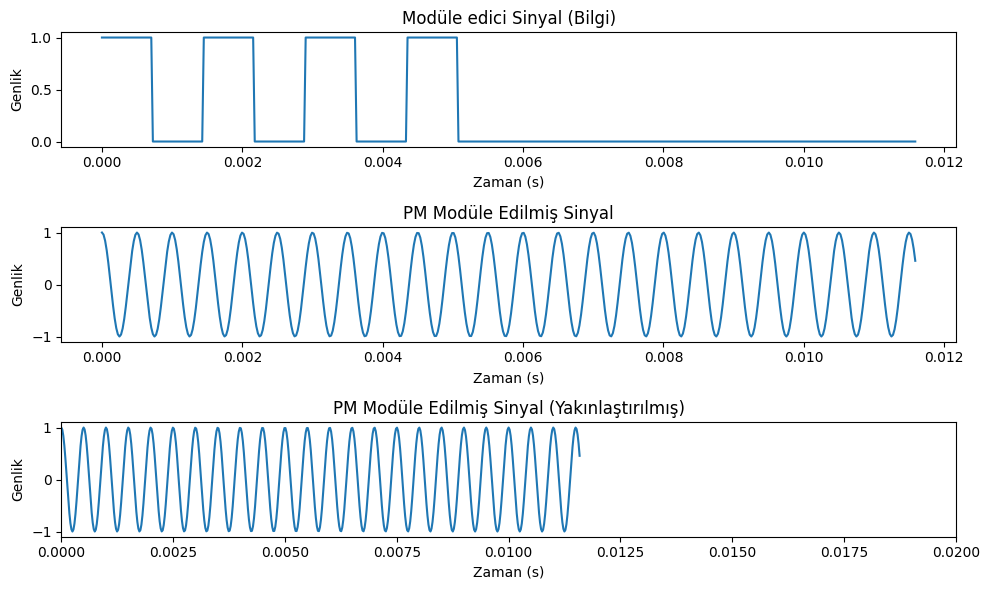

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 440  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kp = 2 * np.pi * 10  # Faz sapması (radyan)

# Modüle edilecek bilgiyi tanımla
data = [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Bilgiyi modüle edici sinyale dönüştür
m = np.zeros_like(t)
for i in range(len(data)):
    start_idx = int(i * chunk / len(data))
    end_idx = int((i + 1) * chunk / len(data))
    m[start_idx:end_idx] = data[i]

# PM modülasyonunu uygula
s = A * np.cos(2 * np.pi * fc * t + kp * m)  # Değişiklik burada

# Sinyalleri çiz
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('Modüle edici Sinyal (Bilgi)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 2)
plt.plot(t, s)
plt.title('PM Modüle Edilmiş Sinyal')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')

plt.subplot(3, 1, 3)
plt.plot(t, s)
plt.title('PM Modüle Edilmiş Sinyal (Yakınlaştırılmış)')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')
plt.xlim(0, 0.02)  # İlk 20 ms'i yakınlaştır

plt.tight_layout()
plt.show()

In [45]:
import numpy as np
import pyaudio
import time

# Ses kayıt parametreleri
FORMAT = pyaudio.paInt16
CHANNELS = 1
CHUNK = 256
rate = 44100

# PM parametreleri
fc = 18300  # Taşıyıcı sinyal frekansı (Hz)
A = 1  # Taşıyıcı sinyal genliği
kp = 2 * np.pi * 10  # Faz sapması (radyan)

# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=rate,
    output=True,
    frames_per_buffer=CHUNK
)
pp=[]
def ses_gonder(bits, fc, kp, t, A):
    """
    Verilen bitleri PM modüle ederek ses cihazına gönderir.

    Args:
        bits: Gönderilecek bit dizisi.
        fc: Taşıyıcı sinyal frekansı (Hz).
        kp: Faz sapması (radyan).
        t: Zaman aralığı.
        A: Taşıyıcı sinyal genliği.
    """
    global pp
    m = np.repeat(bits, CHUNK // len(bits))  # Bitleri zaman aralığına göre genişlet

    # PM modülasyonunu uygula
    s = A * np.cos(2 * np.pi * fc * t + kp * m) * 32767
    pp=s

    # Modüle edilmiş dalgayı ses cihazına gönder
    stream.write(s.astype(np.int16).tobytes())

def onluk_binarye_cevir(onluk_sayi):
  """Verilen onluk sayıyı 16 bitlik bir binary diziye çevirir.

  Args:
      onluk_sayi: Dönüştürülecek onluk sayı.

  Returns:
      16 bitlik binary dizi (liste).
  """
  binary_dizi = np.array([int(bit) for bit in bin(onluk_sayi)[2:].zfill(16)])
  return binary_dizi

# Kullanım örneği:
t = np.arange(0, CHUNK/rate, 1/rate)  # Zaman aralığını tekrar tanımla
v = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.int16)
sayac = 0

for i in range(1000):
    v = onluk_binarye_cevir(i)  # Onluk sayıyı binary diziye çevir (LDPC olmadan)
    ses_gonder(v, fc, kp, t, A)  # Veriyi ses olarak gönder
    #time.sleep(0.002)  # Biraz bekle

# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

ALSA lib pcm_dsnoop.c:601:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmRead

In [ ]:
s=pp

In [51]:
import numpy as np
import pyaudio
import time

# Ses kayıt parametreleri
FORMAT = pyaudio.paInt16
CHANNELS = 1
CHUNK = 256
rate = 44100

# FM parametreleri
fc = 16300  # Taşıyıcı sinyal frekansı (Hz)
A = 1  # Taşıyıcı sinyal genliği
kf = 1000  # Frekans sapması (Hz)

# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=rate,
    output=True,
    frames_per_buffer=CHUNK
)
pp=[]

def ses_gonder(bits, fc, kf, t, A):
    """
    Verilen bitleri FM modüle ederek ses cihazına gönderir.

    Args:
        bits: Gönderilecek bit dizisi.
        fc: Taşıyıcı sinyal frekansı (Hz).
        kf: Frekans sapması (Hz).
        t: Zaman aralığı.
        A: Taşıyıcı sinyal genliği.
    """
    global pp
    m = np.repeat(bits, CHUNK // len(bits))  # Bitleri zaman aralığına göre genişlet
    
    # Modüle edici sinyalin integrali
    integral_m = np.cumsum(m) / rate
    
    # FM modülasyonunu uygula
    s = A * np.cos(2 * np.pi * fc * t + 2 * np.pi * kf * integral_m) * 32767
    pp = s

    # Modüle edilmiş dalgayı ses cihazına gönder
    stream.write(s.astype(np.int16).tobytes())

def onluk_binarye_cevir(onluk_sayi):
    """Verilen onluk sayıyı 16 bitlik bir binary diziye çevirir.

    Args:
        onluk_sayi: Dönüştürülecek onluk sayı.

    Returns:
        16 bitlik binary dizi (liste).
    """
    binary_dizi = np.array([int(bit) for bit in bin(onluk_sayi)[2:].zfill(16)])
    return binary_dizi

# Kullanım örneği:
t = np.arange(0, CHUNK/rate, 1/rate)  # Zaman aralığını tekrar tanımla
v = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.int16)
sayac = 0

for i in range(1000):
    v = onluk_binarye_cevir(i)  # Onluk sayıyı binary diziye çevir
    ses_gonder(v, fc, kf, t, A)  # Veriyi ses olarak gönder

# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

ALSA lib pcm_dsnoop.c:601:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmRead

In [9]:
import numpy as np
from scipy.signal import hilbert

def pmmod(x, fc, fs, phasedev):
  """
  Faz modülasyonu uygulayan fonksiyon.

  Args:
    x: Modüle edilecek giriş sinyali (NumPy dizisi).
    fc: Taşıyıcı sinyal frekansı (Hz).
    fs: Örnekleme hızı (Hz).
    phasedev: Faz sapması (radyan cinsinden).

  Returns:
    Faz modüle edilmiş sinyal (NumPy dizisi).
  """

  t = np.arange(0, len(x) / fs, 1 / fs) # Zaman vektörü
  
  # Faz modülasyonu denklemi:
  y = np.exp(1j * (2 * np.pi * fc * t + phasedev * x))

  return y

# Örnek kullanımı
fs = 1000
t = np.arange(0, 2*fs+1) / fs
x = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)

fc = 10000
phasedev = np.pi / 2

tx = pmmod(x, fc, fs, phasedev)

# Sonuçları çiz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Giriş Sinyali')

plt.subplot(2, 1, 2)
plt.plot(t, tx.real)
plt.title('Faz Modüle Edilmiş Sinyal')

plt.tight_layout()
plt.show()

TypeError: 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import time

# Parametreler
fs = 44100  # Örnekleme hızı (Hz)
fc = 100  # Taşıyıcı sinyal frekansı (Hz)
kp = np.pi  # Faz sapması (radyan)
A = 1  # Taşıyıcı sinyal genliği
duration = 0.2  # Sinyal süresi (saniye)
t = np.arange(0, duration, 1/fs)  # Zaman vektörü

# Mesaj sinyali
message_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t)

# Taşıyıcı sinyal
carrier_signal = A * np.cos(2 * np.pi * fc * t)

# PM modülasyonu
pm_signal = A * np.cos(2 * np.pi * fc * t + kp * message_signal)

# PM demodülasyonu
phase_change = np.unwrap(np.angle(hilbert(pm_signal)))
demodulated_signal = phase_change / kp

# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(t, message_signal)
plt.title('Mesaj Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, carrier_signal)
plt.title('Taşıyıcı Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, pm_signal)
plt.title('PM Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, demodulated_signal)
plt.title('PM Demodülasyon Sinyali')
plt.xlabel('Zaman')
plt.ylabel('Genlik')
plt.grid(True)

plt.tight_layout()
plt.show()

# Ses olarak gönderme
# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()

# Çıkış akışını aç
stream = p.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=fs,
    output=True,
    frames_per_buffer=int(fs * 0.01)  # Her 10 ms'de bir gönder
)

# Verileri gönder

for i in range(int(duration * fs / (fs * 0.01))):
    stream.write(pm_signal[int(i * fs * 0.01):int((i + 1) * fs * 0.01)].astype(np.int16).tobytes())

# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

print('Veri başarıyla gönderildi!')

NameError: name 'hilbert' is not defined

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parametreleri belirle
fs = 100000
fc = 200
t = np.arange(0, 0.2, 1/fs)
phasedev = np.pi / 2

# İki tonlu sinüzoidal mesaj sinyalini oluştur
x = np.sin(2 * np.pi * 30 * t) + np.sin(2 * np.pi * 60 * t)+np.sin(2 * np.pi * 30 * t)

# Mesaj sinyalini çiz
plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message Signal')
plt.grid(True)

# Taşıyıcı sinyalini oluştur ve çiz
c = np.sin(2 * np.pi * fc * t)
plt.subplot(4, 1, 2)
plt.plot(t, c)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier Signal')
plt.grid(True)

# Faz modülasyonu
def pmmod(x, fc, fs, phasedev):
    # Envelop sinyalini hesapla
    integral_of_x = np.cumsum(x) / fs
    return np.cos(2 * np.pi * fc * t + phasedev * integral_of_x)

# Modüle edilmiş sinyali oluştur ve çiz
y = pmmod(x, fc, fs, phasedev)
plt.subplot(4, 1, 3)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PM Signal')
plt.grid(True)

# Faz demodülasyonu
def pmdemod(y, fc, fs, phasedev):
    analytic_signal = hilbert(y)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    return np.diff(instantaneous_phase) / (phasedev * (2 * np.pi * fs))

# Demodüle edilmiş sinyali oluştur ve çiz
z = pmdemod(y, fc, fs, phasedev)
# Z'nin uzunluğu t'den bir eksik olacak, bu yüzden t'yi ayarlamamız gerekiyor
t_z = t[:-1]

plt.subplot(4, 1, 4)
plt.plot(t_z, z)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PM Demodulated Signal')
plt.grid(True)

plt.tight_layout()
plt.show()


TypeError: 

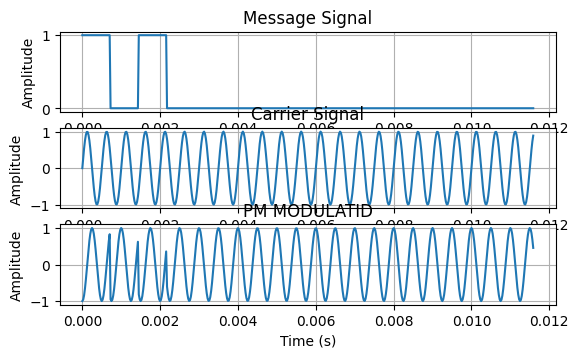

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fs = 100000
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 4400  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kp=np.pi

bits = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.int16)
x_t = np.repeat(bits, chunk // len(bits))  # Bitleri zaman aralığına göre genişlet

Q=kp*x_t
pm=A*np.cos(2*np.pi*fc*t +Q)
c=A*np.cos(2*np.pi*fc*t)
# Mesaj sinyalini çiz
plt.subplot(4, 1, 1)
plt.plot(t, x_t)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message Signal')
plt.grid(True)

# Taşıyıcı sinyalini oluştur ve çiz
c = np.sin(2 * np.pi * fc * t)
plt.subplot(4, 1, 2)
plt.plot(t, c)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier Signal')
plt.grid(True)

# Taşıyıcı sinyalini oluştur ve çiz
c = np.sin(2 * np.pi * fc * t)
plt.subplot(4, 1, 3)
plt.plot(t, pm)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PM MODULATID')
plt.grid(True)

# Faz modülasyonu
def pmmod(x, fc, fs, phasedev):
    # Envelop sinyalini hesapla
    integral_of_x = np.cumsum(x) / fs
    return np.cos(2 * np.pi * fc * t + phasedev * integral_of_x)



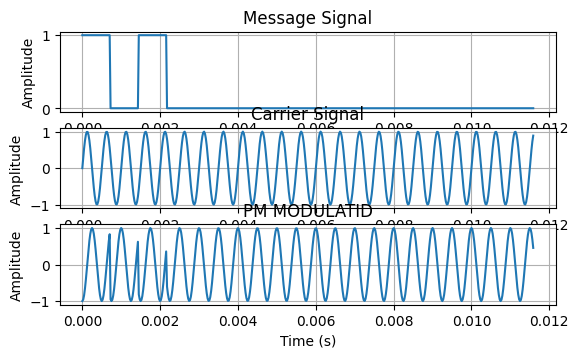

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreleri tanımla
chunk = 512
rate = 44100
fs = 100000
fc = 2000  # Taşıyıcı sinyal frekansı (Hz)
fm = 4400  # Modüle edici sinyal frekansı (Hz)
t = np.arange(0, chunk/rate, 1/rate)  # Zaman aralığı
A = 1  # Taşıyıcı sinyal genliği
kp=np.pi

bits = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.int16)
x_t = np.repeat(bits, chunk // len(bits))  # Bitleri zaman aralığına göre genişlet

Q=kp*x_t
pm=A*np.cos(2*np.pi*fc*t +Q)
c=A*np.cos(2*np.pi*fc*t)
# Mesaj sinyalini çiz
plt.subplot(4, 1, 1)
plt.plot(t, x_t)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message Signal')
plt.grid(True)

# Taşıyıcı sinyalini oluştur ve çiz
c = np.sin(2 * np.pi * fc * t)
plt.subplot(4, 1, 2)
plt.plot(t, c)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier Signal')
plt.grid(True)

# Taşıyıcı sinyalini oluştur ve çiz
c = np.sin(2 * np.pi * fc * t)
plt.subplot(4, 1, 3)
plt.plot(t, pm)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PM MODULATID')
plt.grid(True)
